In [1]:
import matplotlib.pyplot as plt

In [9]:
class Word:
    def __init__(self, data):
        """
        初始化 Word 对象
        :param data: 汉字矢量图的点坐标数据
        """
        self.data = data
        self.strokes = []

    def split_dot(self):
        """
        将汉字矢量图的点坐标数据切分成笔画
        """
        total_length = self.data[0]
        index = 3
        current_stroke = []

        while index + 1 <= total_length:
            x, y = self.data[index], self.data[index + 1]

            if x == -64 and y == 0:
                if current_stroke:
                    self.strokes.append(current_stroke)
                    current_stroke = []
            elif x == -64 and y == -64:
                break
            else:
                current_stroke.append((x, y))

            index += 2

        if current_stroke:
            self.strokes.append(current_stroke)

    def identify_radical(self):
        """
        识别汉字的部首部分，将其作为一个整体返回
        :return: 部首的所有笔画列表
        """
        radical_strokes = []

        # 假设部首通常在汉字左侧或顶部，根据x坐标值判断
        for stroke in self.strokes:
            if all(point[0] <= 0 for point in stroke): 
                radical_strokes.append(stroke)
        
        return radical_strokes

    def draw_radical(self):
        """
        连贯绘制汉字的部首
        """
        radical_strokes = self.identify_radical()

        if not radical_strokes:
            print("未识别到部首")
            return

        plt.figure(figsize=(6, 6))
        plt.xlim(-20, 20)
        plt.ylim(-20, 20)

        # 绘制部首的所有笔画作为整体
        for stroke in radical_strokes:
            x_coords, y_coords = zip(*stroke)  # 提取所有点的x和y坐标
            plt.plot(x_coords, [-y for y in y_coords], marker='.', color='k')

        plt.axis('equal')
        plt.title("识别出的部首（连贯输出）")
        plt.show()

def run(file_path, word_index):
    """
    运行汉字矢量图切分和绘制部首
    :param file_path: 汉字矢量图点坐标文件路径
    :param word_index: 要处理的汉字索引
    """
    words = []

    with open(file_path, 'r') as file:
        for line in file.readlines():
            data = list(map(int, line.strip(',,,,,,\n').split(',')))
            words.append(Word(data))

    words[word_index].split_dot()
    words[word_index].draw_radical()

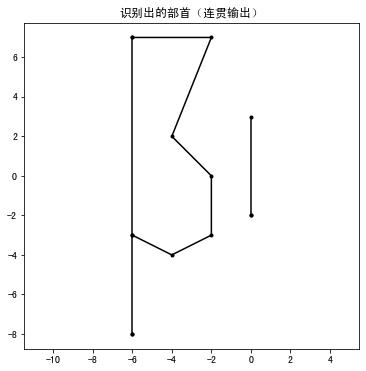

In [25]:
if __name__ == '__main__':
    # 示例运行，选择第一个汉字（索引0）
    run(r"hz（去噪声）.txt", 0)
